# Fake News Detection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_true = pd.read_csv('true.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_fake = pd.read_csv('fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake['status'] = 0
df_true['status'] = 1
df_true.head()

,title,text,subject,date,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
df_fake.head()

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
df = pd.concat([df_fake,df_true],axis=0)
df

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [12]:
df.columns

Index(['title', 'text', 'subject', 'date', 'status'], dtype='object')

In [14]:
df_sap = df.drop(['title','subject','date'],axis='columns')
df_sap

,text,status
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [15]:
df_sap.isnull().sum()

text      0
status    0
dtype: int64

In [16]:
df_sap = df_sap.sample(frac = 1)
df_sap

,text,status
19040,An Indian athlete who overcame a visa denial w...,0
13117,BERLIN (Reuters) - Germany should be more asse...,1
15412,BANGKOK (Reuters) - Thailand s Puea Thai Party...,1
8530,If you were not aware there is a seriously old...,0
12847,The Office of Immigration Statistics reported ...,0
...,...,...
4062,"Eric Trump, the son of the GOP presidential no...",0
9939,WASHINGTON (Reuters) - U.S. House Speaker Paul...,1
16115,ABUJA (Reuters) - President Muhammadu Buhari o...,1
2667,WASHINGTON (Reuters) - An aggressive corporate...,1


In [17]:
df_sap.head()

,text,status
19040,An Indian athlete who overcame a visa denial w...,0
13117,BERLIN (Reuters) - Germany should be more asse...,1
15412,BANGKOK (Reuters) - Thailand s Puea Thai Party...,1
8530,If you were not aware there is a seriously old...,0
12847,The Office of Immigration Statistics reported ...,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sap.text,df_sap.status,test_size=0.2,random_state=10)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [21]:
X_test_count=v.transform(X_test)
model.score(X_test_count,y_test)

0.9561247216035634

In [26]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [27]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [28]:
clf.score(X_test,y_test)

0.9561247216035634

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
clf_lr = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('lr', LogisticRegression(max_iter = 1000))
])

In [35]:
clf_lr.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [36]:
clf_lr.score(X_test,y_test)

0.9968819599109131

In [38]:
from sklearn.metrics import classification_report

pred_lr=clf_lr.predict(X_test)
classification_report(y_test, pred_lr)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4757\n           1       1.00      1.00      1.00      4223\n\n    accuracy                           1.00      8980\n   macro avg       1.00      1.00      1.00      8980\nweighted avg       1.00      1.00      1.00      8980\n'

Text(0.5, 1.0, 'Barplot of Actual vs. Predicted Values')

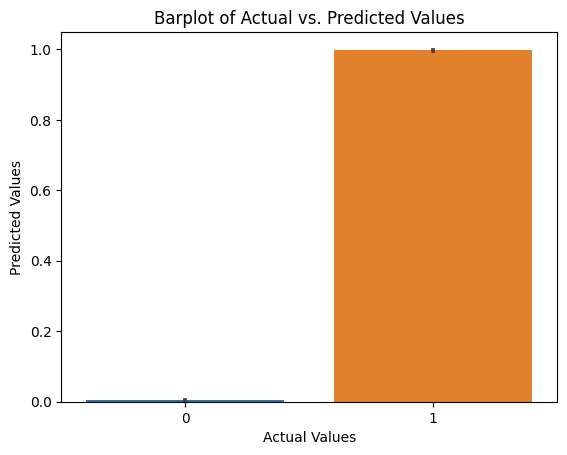

In [41]:
import seaborn as sns

sns.barplot(x=y_test, y=pred_lr)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Barplot of Actual vs. Predicted Values')

In [45]:
import pickle
with open('fake_news_Detector.pickle','wb') as f:
    pickle.dump(clf_lr,f)

In [46]:

with open('fake_news_Detector.pickle', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [47]:
teext = [
    'MARAWI CITY, Philippines (Reuters) - Khaliluddin Ismail returned home on Sunday after five months of war in the southern Philippines to find his house ransacked. But he s still smiling.  At least we have something left,  he said, standing in a room with clothes, toys, ornaments and damaged pictures strewn across the floor.  Others have nothing. They lost their homes, they lost their lives.  Ismail, 44, the Imam of a nearby mosque, considers himself one of the luckiest people in Marawi. The city was devastated by more than 150 days of battles between government forces and pro-Islamic State militants that killed more than 1,100 people and displaced some 350,000. His house is in Marawi s safe zone, an area long abandoned by residents but untouched by unrelenting shelling and military air strikes that have all but flattened the city s commercial heart, destroying thousands of homes, shops and vehicles. Six days after troops killed the last remaining rebels, Ismail was among about 4,000 people allowed to return to their homes on Sunday in Marawi s Basak Malutlot area. Many like him have discovered their houses were looted and left in disarray.  I opened the door and I was shocked, but I m still happy to be home,  he said. Ismail fled with his family on May 24 during a fierce three-day firefight that erupted just 50 meters away, when security forces tried to raid the hideout of notorious militant leader Isnilon Hapilon, Islamic State s anointed  emir  in Southeast Asia. Hapilon escaped, then issued a call to arms to hundreds of insurgents to initiate their planned takeover of Marawi. It sparked the Philippines  biggest urban battle in recent history, and fears that Islamic State s extremist agenda had gained a foothold in the south of the mainly Catholic country. There were scenes of joy and chaos as a convoy of returning residents poured in to Marawi to a cacophony of horns and whistles, jamming what only a few hours earlier were deserted streets. Armed police at checkpoints cross-checked documents and pictures of each passengers from the 712 families, to guard against possible infiltration by militants. Babies cried as officials at a public hall shouted on megaphones to try to establish order as hundreds jostled to register for the sack of rice and 5,000 pesos ($97) allocated to each household. With a stern face, the district s elderly chairwoman, Jamellah Indol Saro, yelled in the local Maranao dialect at anxious residents to calm down.  I told them we have to thank Allah we re still alive,  she said, smiling. Some 6,500 families are due to return this week in a phased repatriation, a fraction of the 77,000 that fled to evacuation camps or nearby towns. Many face a lengthy wait for vast swathes of Marawi to be rebuilt. Retired government employee Mitormar Goling, 72, came home to find jewellery, money, furniture and antiques had been stolen. He said he feared he would have starved or been killed had he stayed behind.  We felt the ground trembling from the air strikes. We didn t know if the army could protect us,  said Goling, wearing sunglasses and a white skull cap.  If you don t believe in their ideology, ISIS sees you as the enemy,  he said, referring to Islamic State. He was among many people who said they understood that the military had to destroy the city to save it. Norida Manna s three-storey house was levelled by an air strike, but she s thankful she s alive.  The office clerk and single mother of six will now live at her sister s home, from which she fled in May as troops outside battled hooded, black-clad gunmen who helped the escape of Hapilon. The rebel commander was subsequently killed in a military operation 13 days ago.   My home was destroyed, but I don t blame the military. They had a job to do,  she said.  I have nothing left, but to us, every day is a happy one now.',
    'This is where we re heading with the Obama administration and nut jobs like Bill Nye. Last month, DOJ s Loretta Lynch suggested that they had been looking into prosecuting skeptics of global warming (video below). I kid you not! LORETTA LYNCH DISCUSSES CIVIL ACTION FOR CLIMATE CHANGE DENIERS: '
]

loaded_model.predict(teext)

array([1, 0])